#Code for Visualizing Step-Times

This notebook visualizes step-time data collected over a three-day period while the experimental use case was running. The task of each code section is described below:


1. ibraries are imported and drive files are mounted.
2. Load the dataset that will be used to plot the data in the following sections.
3. Plot the data of all the Step-times during all the experimentation period.
4. Plot data regarding to the Pressure losses
5. Plot data regarding to the Air pressure fluctuations
6. Plot data regarding to the Air leakage detection














##1. Import libraries and mount drive


In [14]:
!pip install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import math
from google.colab import drive
from google.colab import files
import matplotlib.dates as mdates
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2. Load dataset

In [2]:
# --- Load data ---
# HERE DEFINE THE .CSV FILE PATH ON DRIVE.
File_path = pd.read_csv('/content/drive/My Drive/SMC/Review/Methodology_steptime_2024-11-08_12-39-52.csv')


In [3]:
File_path.head()

,Steptime1,Steptime2,Steptime3,Steptime4,Steptime5,Steptime6,Steptime7,Steptime8,Steptime9,Steptime10,...,Steptime44,Steptime45,Steptime46,Steptime47,Steptime48,Steptime49,Steptime50,Steptime51,Scan cycle,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366,2024-11-08 12:39:55
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358,2024-11-08 12:39:56
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338,2024-11-08 12:39:57
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365,2024-11-08 12:39:58
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.358,2024-11-08 12:40:00


##3. Plot all Steptime data

In [13]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime

def plot_steptime_vs_time(df, module_name):
    df['Date'] = pd.to_datetime(df['Date'])
    steptime_cols = [c for c in df.columns if c.startswith("Steptime")]

    for column in steptime_cols:
        df_Steptime = df[[column, 'Date']].dropna()

        plt.figure(figsize=(20, 6))
        plt.scatter(df_Steptime['Date'], df_Steptime[column], s=2, color='b')

        plt.xlabel('Date', fontsize=22)
        plt.ylabel(f'{column} (ms)', fontsize=22)
        plt.title(f'{module_name} - {column} vs Date', fontsize=25)

        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())


        def custom_label(x, pos):
            dt = mdates.num2date(x)
            if dt.hour in [0, 12] and dt.minute == 0:
                return dt.strftime('%Y-%m-%d %H:%M')
            else:
                return ''
        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_label))


        plt.xticks(rotation=45, ha='right')
        plt.yticks(fontsize=20)


        for ts in df_Steptime['Date']:
            if ts.hour in [0, 12] and ts.minute == 0:
                plt.axvline(ts, color='gray', linestyle='--', linewidth=0.5)

        plt.grid(True)
        plt.tight_layout()
        plt.show()


plot_steptime_vs_time(File_path, 'Step-time')

Output hidden; open in https://colab.research.google.com to view.

##4. Plots of results showing Pressure losses

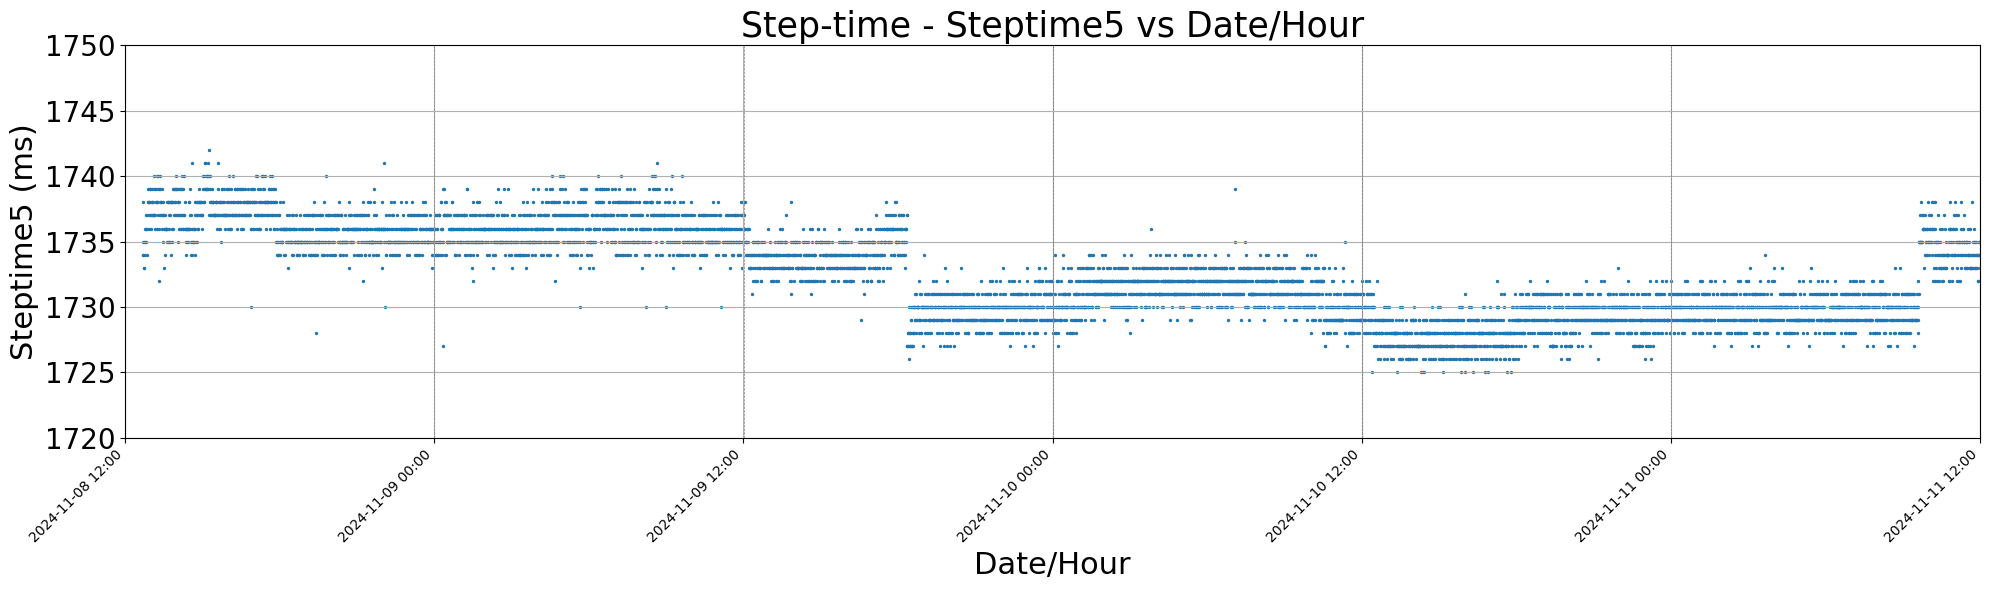

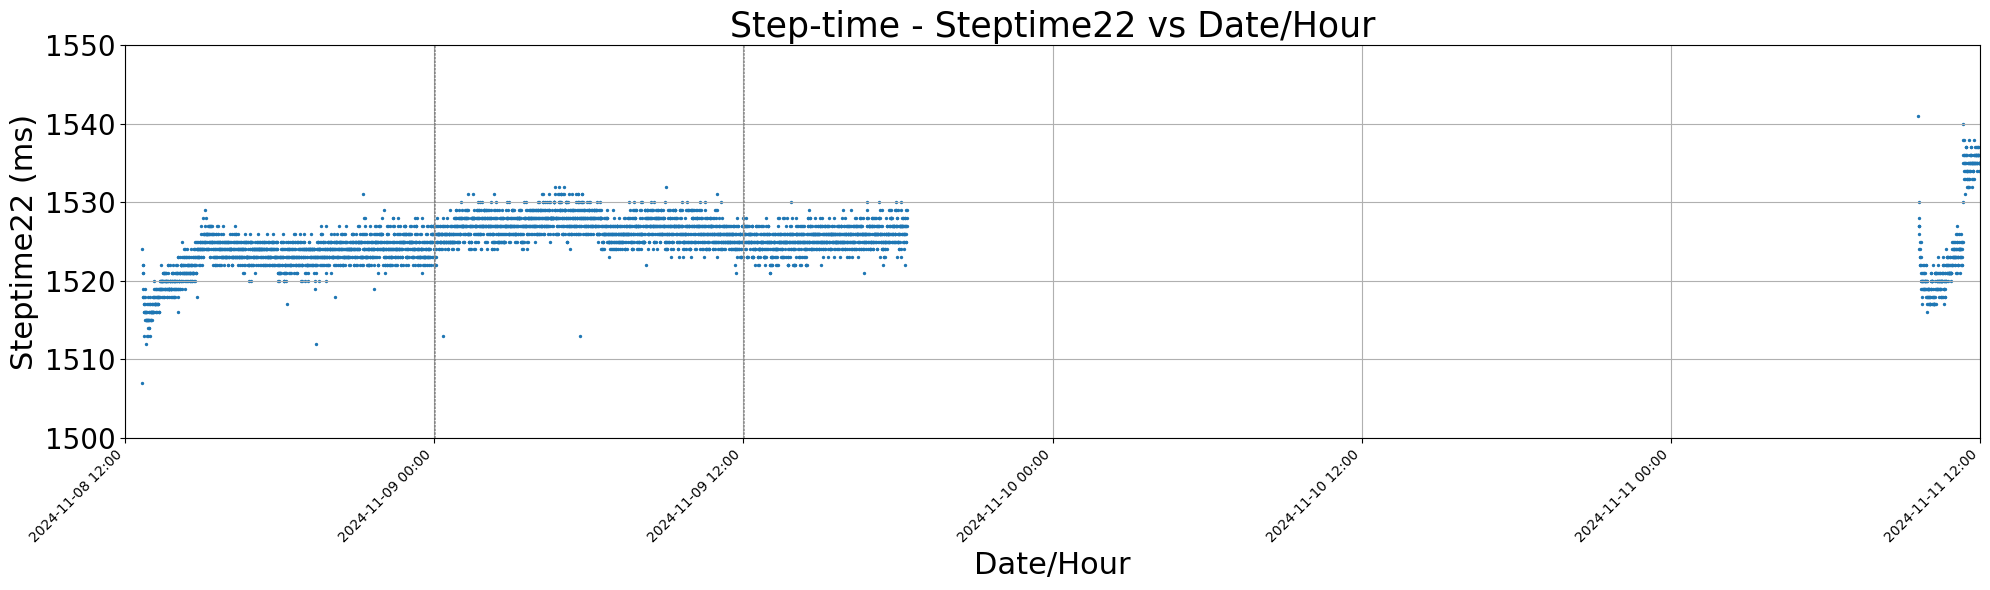

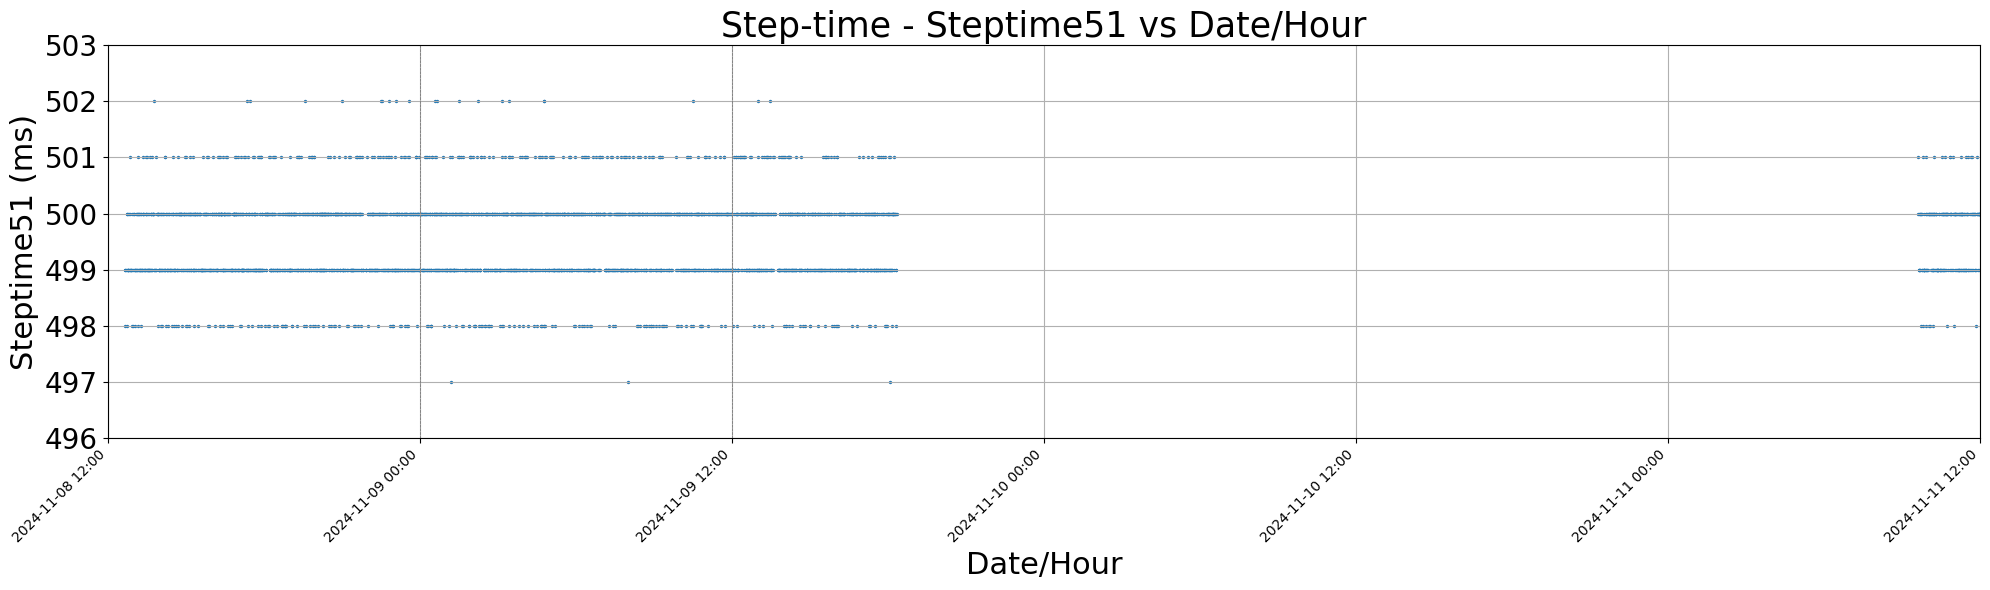

In [8]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def plot_steptime_vs_time(df, module_name):
    # ensure Date is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # only plot these three
    desired = ['Steptime5', 'Steptime22', 'Steptime51']
    steptime_cols = [c for c in desired if c in df.columns]

    # common x‐limits for all three plots
    x_start = pd.to_datetime("2024-11-08 12:00:00")
    x_end   = pd.to_datetime("2024-11-11 12:00:00")

    for column in steptime_cols:
        df_sub = df[['Date', column]].dropna()

        fig, ax = plt.subplots(figsize=(20, 6))
        ax.scatter(df_sub['Date'], df_sub[column], s=2)

        # set the y‐limits based on column
        if column == 'Steptime5':
            ax.set_ylim(1720, 1750)
        elif column == 'Steptime22':
            ax.set_ylim(1500, 1550)
        elif column == 'Steptime51':
            ax.set_ylim(496, 503)

        # set the common x‐limits
        ax.set_xlim(x_start, x_end)

        # formatting
        ax.set_xlabel('Date/Hour', fontsize=22)
        ax.set_ylabel(f'{column} (ms)', fontsize=22)
        ax.set_title(f'{module_name} - {column} vs Date/Hour', fontsize=25)

        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        def custom_label(x, pos):
            dt = mdates.num2date(x)
            return dt.strftime('%Y-%m-%d %H:%M') if (dt.hour in (0,12) and dt.minute==0) else ''
        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_label))

        # vertical dashed lines at midnight/noon
        for ts in df_sub['Date']:
            if ts.hour in (0,12) and ts.minute == 0:
                ax.axvline(ts, color='gray', linestyle='--', linewidth=0.5)

        plt.xticks(rotation=45, ha='right')
        plt.yticks(fontsize=20)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# usage
plot_steptime_vs_time(File_path, 'Step-time')


##5. Plots of results showing Air pressure fluctuations

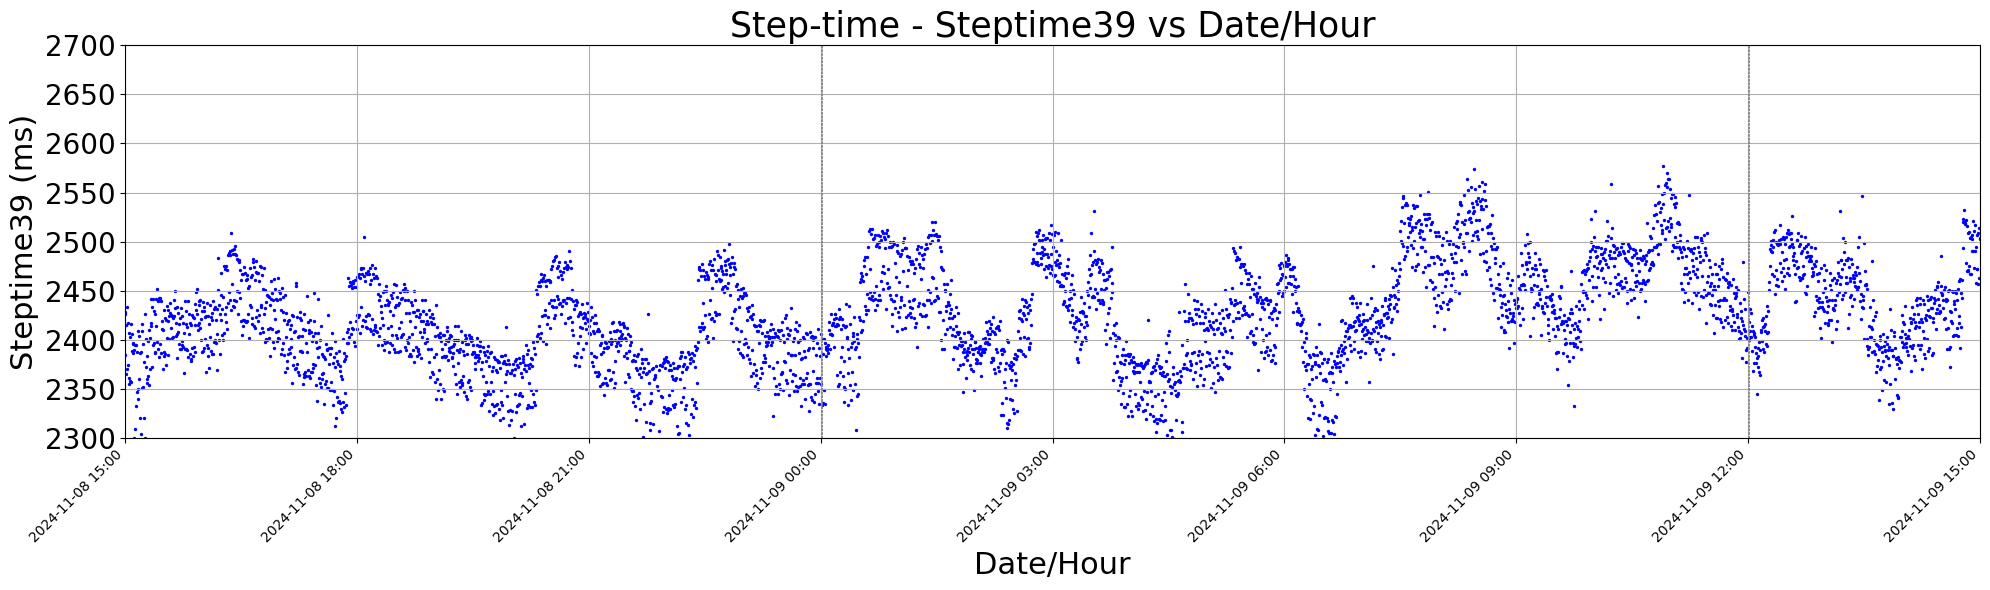

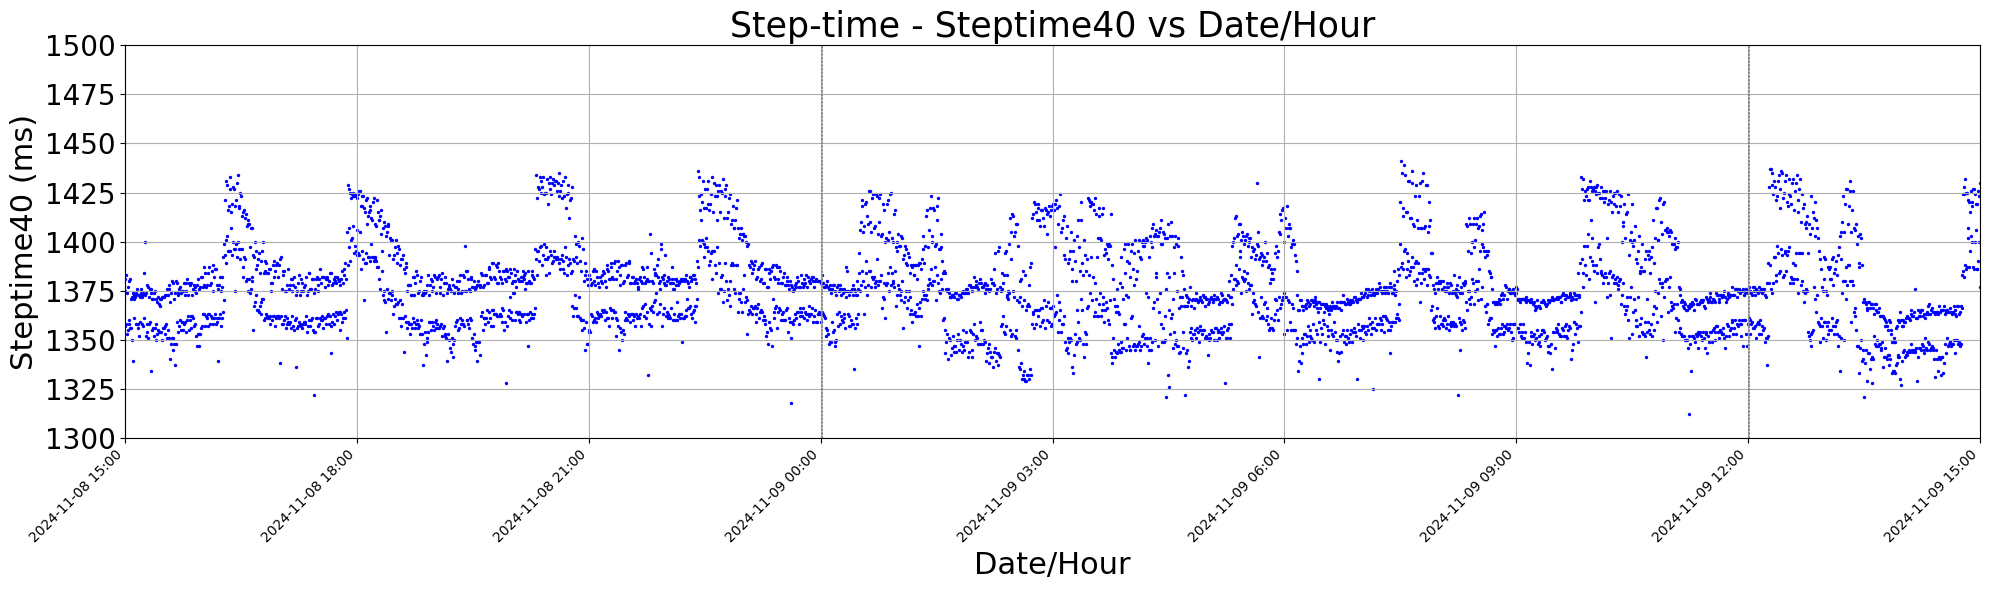

In [9]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def plot_steptime39_40_vs_time(df, module_name):
    # 1) ensure Date is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # 2) choose only the two columns we care about
    desired = ['Steptime39', 'Steptime40']
    steptime_cols = [c for c in desired if c in df.columns]

    # 3) set the common x‐limits
    x_start = pd.to_datetime("2024-11-08 15:00:00")
    x_end   = pd.to_datetime("2024-11-09 15:00:00")

    for column in steptime_cols:
        sub = df[['Date', column]].dropna()

        fig, ax = plt.subplots(figsize=(20, 6))
        ax.scatter(sub['Date'], sub[column], s=2, color='b')

        # 4) apply our zoom window
        ax.set_xlim(x_start, x_end)

        # 5) set each y‐limit to match your example
        if column == 'Steptime39':
            ax.set_ylim(2300, 2700)
        else:  # Steptime40
            ax.set_ylim(1300, 1500)

        # 6) formatting
        ax.set_xlabel('Date/Hour', fontsize=22)
        ax.set_ylabel(f'{column} (ms)', fontsize=22)
        ax.set_title(f'{module_name} - {column} vs Date/Hour', fontsize=25)

        # label only at hour‐multiples of 6 if you like, or keep AutoDateLocator
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        def custom_label(x, pos):
            dt = mdates.num2date(x)
            # show every tick label
            return dt.strftime('%Y-%m-%d %H:%M')
        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_label))

        # vertical lines at each midnight & noon
        for ts in sub['Date']:
            if ts.hour in (0, 12) and ts.minute == 0:
                ax.axvline(ts, color='gray', linestyle='--', linewidth=0.5)

        plt.xticks(rotation=45, ha='right')
        plt.yticks(fontsize=20)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# usage
plot_steptime39_40_vs_time(File_path, 'Step-time')


##6. Plots of results showing Air leakage detection  

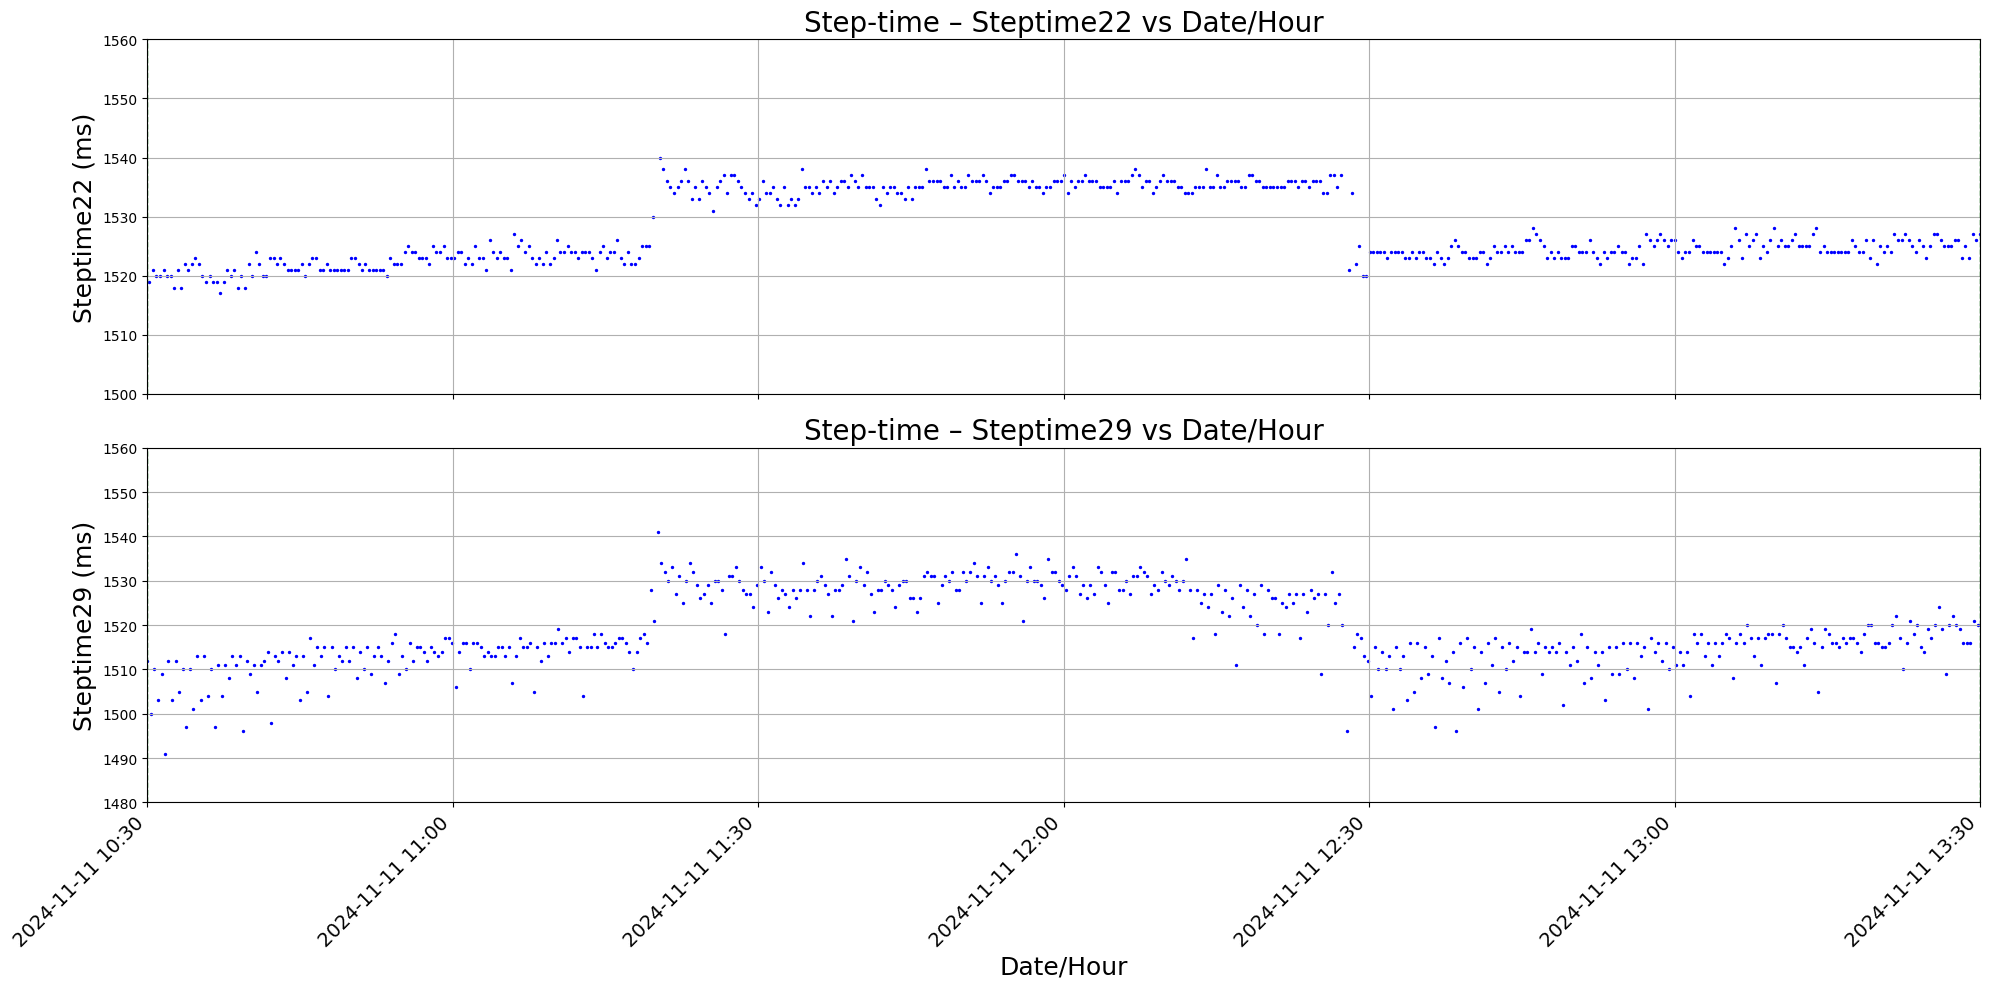

In [12]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def plot_steptime22_29(df, module_name):
    # 1) ensure Date is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # 2) pick out just the two columns we want
    desired = ['Steptime22', 'Steptime29']
    steptime_cols = [c for c in desired if c in df.columns]

    # 3) define our zoom window
    x_start = pd.to_datetime("2024-11-11 10:30:00")
    x_end   = pd.to_datetime("2024-11-11 13:30:00")

    # 4) make one figure, two rows, shared x-axis
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20, 10))

    for ax, column in zip(axes, steptime_cols):
        sub = df[['Date', column]].dropna()

        # scatter
        ax.scatter(sub['Date'], sub[column], s=2, color='b')

        # x & y limits
        ax.set_xlim(x_start, x_end)
        if column == 'Steptime22':
            ax.set_ylim(1500, 1560)
        else:  # Steptime29
            ax.set_ylim(1480, 1560)

        # titles & labels
        ax.set_title(f'{module_name} – {column} vs Date/Hour', fontsize=20)
        ax.set_ylabel(f'{column} (ms)', fontsize=18)

        # green dashed lines at window edges
        ax.axvline(x_start, color='green', linestyle='--', linewidth=1)
        ax.axvline(x_end,   color='green', linestyle='--', linewidth=1)

        # grid
        ax.grid(True)

    # format the shared x-axis on the bottom subplot
    bottom = axes[-1]
    bottom.set_xlabel('Date/Hour', fontsize=18)
    bottom.xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0,30]))
    bottom.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.setp(bottom.get_xticklabels(), rotation=45, ha='right', fontsize=14)
    plt.tight_layout()
    plt.show()


# usage
plot_steptime22_29(File_path, 'Step-time')
